#### Imports

In [1]:
from Neuron import *
from NeuronLayer import *
from NeuronNetwork import *
import random
import pandas as pd

#### Maken van een waarheidstabel

In [2]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een perceptron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:
        output = function(item[0])
        data.append([item[0], output])
    return data


In [3]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""

    columns = ['Input', 'Output']

    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

#### Random startwaarden

In [4]:
def generate_random_float():
    return round(random.uniform(-10, 10),1)

def generate_random_list(numbers):
    lst = []
    for item in range(numbers):
        lst.append(generate_random_float())
    return lst

## Perceptron unit


#### AND
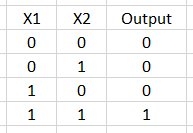


In [9]:
"""AND Test"""

# n_and = Neuron('AND', generate_random_float(), generate_random_list(2))
n_and = Neuron('AND', -1.2, [0.5, 0.1])
print(n_and)

and_expectation = [[[False, False], False],  
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]
print_table(and_expectation, 'Verwachting')

old_output = create_table_data(n_and.activation, and_expectation)
print_table(old_output, 'Uitkomst VOOR training')

for i in range(100):
    random.shuffle(and_expectation)
    for input_list, expectation in and_expectation:

        output = n_and.activation(input_list)
        n_and.calculate_error_output(n_and.output, expectation)
        n_and.update(input_list)

and_expectation = [[[False, False], False],  # Omdat de eerste dataset is geshuffled
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]

updated_output = create_table_data(n_and.activation, and_expectation)
print_table(updated_output, 'Uitkomst Na Training')

print(n_and)

<AND port>
- Bias = -1.2
- Weights = [0.5, 0.1]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst VOOR training>
             Input    Output
0  [False, False]  0.231475
1   [False, True]  0.249740
2   [True, False]  0.331812
3    [True, True]  0.354344

<Uitkomst Na Training>
             Input    Output
0  [False, False]  0.000171
1   [False, True]  0.050673
2   [True, False]  0.050997
3    [True, True]  0.943759

<AND port>
- Bias = -8.674244543082525
- Weights = [5.7505896541031865, 5.743885645265981]



In [18]:
"""XOR Test"""

N1 = Neuron('Neuron 1', -1, [1, 1])
N2 = Neuron('Neuron 2', -1, [0.5, 0.5])
outputNeuron = Neuron('Output Neuron', 0, [0.6, 1])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2])
outputLayer = NeuronLayer('Output Layer', [outputNeuron])

network_xor = NeuronNetwork([hiddenLayer, outputLayer])

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

print_table(xor_expectation, "Verwachting")

old_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(old_output, 'Uitkomst VOOR training')

network_xor.train(xor_expectation, 1000)

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

new_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(new_output, 'Uitkomst NA training')


<Verwachting>
             Input   Output
0  [False, False]  [False]
1   [False, True]   [True]
2   [True, False]   [True]
3    [True, True]  [False]

<Uitkomst VOOR training>
             Input                Output
0  [False, False]  [0.6059468015087622]
1   [False, True]  [0.6631895793149735]
2   [True, False]  [0.6631895793149735]
3    [True, True]  [0.7188238810813806]

<Uitkomst NA training>
             Input                  Output
0  [False, False]  [0.012280355262875025]
1   [False, True]    [0.9864443571155085]
2   [True, False]    [0.9863483719710301]
3    [True, True]    [0.0177275579983665]



In [7]:
"""ADDER Test"""

N1 = Neuron('Neuron 1', 0, [1, 1])
N2 = Neuron('Neuron 2', 0, [1, 1])
N3 = Neuron('Neuron 3', 0, [1, 1])

outputNeuron1 = Neuron('Output Neuron', -1.2, [0.5, 0.1, 1])
outputNeuron2 = Neuron('Output Neuron', -1.2, [0.5, 0.15, 0.8])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2, N3])
outputLayer = NeuronLayer('Output Layer', [outputNeuron1, outputNeuron2])

network_adder = NeuronNetwork([hiddenLayer, outputLayer])
print(network_adder)

adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]

print_table(adder_expectation, "Verwachting")

old_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(old_output, 'Uitkomst VOOR training')

network_adder.train(adder_expectation, 25000)
adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]



new_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(new_output, 'Uitkomst NA training')




----------------------------------------
Dit netwerk bestaat uit 2 layers

<Verwachting>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]

<Uitkomst VOOR training>
             Input                                     Output
0  [False, False]    [0.401312339887548, 0.3834334954786807]
1   [False, True]  [0.49242401130314856, 0.4650657469449089]
2   [True, False]  [0.49242401130314856, 0.4650657469449089]
3    [True, True]    [0.5521287167773176, 0.519279377518996]

<Uitkomst NA training>
             Input                                         Output
0  [False, False]  [0.002509190512634199, 0.0010643064043387616]
1   [False, True]    [0.9981405746139544, 0.0012099223362366904]
2   [True, False]    [0.9981397299223208, 0.0012054603643023606]
3    [True, True]    [0.0016052309090875884, 0.9984514238665309]

